# CPWG analysis

This example shows how to use PyAEDT to create a CPWG (coplanar waveguide with ground) design
in 2D Extractor and run a simulation.

Keywords: **Q2D**, **CPWG**.

## Perform imports and define constants

Perform required imports.

In [1]:
import os
import tempfile
import time

In [2]:
import ansys.aedt.core

Define constants.

In [3]:
AEDT_VERSION = "2024.2"
NUM_CORES = 4
NG_MODE = False  # Run the example without opening the UI.

## Create temporary directory

Create a temporary directory where downloaded data or
dumped data can be stored.
If you'd like to retrieve the project data for subsequent use,
the temporary folder name is given by ``temp_folder.name``.

In [4]:
temp_folder = tempfile.TemporaryDirectory(suffix=".ansys")

## Launch AEDT and 2D Extractor

Launch AEDT 2024.2 in graphical mode and launch 2D Extractor. This example
uses SI units.

In [5]:
q2d = ansys.aedt.core.Q2d(
    version=AEDT_VERSION,
    non_graphical=NG_MODE,
    new_desktop=True,
    project=os.path.join(temp_folder.name, "cpwg"),
    design="coplanar_waveguide",
)

PyAEDT INFO: Python version 3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


PyAEDT INFO: PyAEDT version 0.12.dev0.


PyAEDT INFO: Initializing new Desktop session.


PyAEDT INFO: Log on console is enabled.


PyAEDT INFO: Log on file C:\Users\ansys\AppData\Local\Temp\pyaedt_ansys_762b70e5-1ac8-43da-b533-be2c146335ea.log is enabled.


PyAEDT INFO: Log on AEDT is enabled.


PyAEDT INFO: Debug logger is disabled. PyAEDT methods will not be logged.


PyAEDT INFO: Launching PyAEDT with gRPC plugin.


PyAEDT INFO: New AEDT session is starting on gRPC port 63173


PyAEDT INFO: AEDT installation Path C:\Program Files\AnsysEM\v242\Win64


PyAEDT INFO: Ansoft.ElectronicsDesktop.2024.2 version started with process ID 6516.


PyAEDT INFO: Project cpwg has been created.


PyAEDT INFO: Added design 'coplanar_waveguide' of type 2D Extractor.


PyAEDT INFO: Aedt Objects correctly read


## Create model

Define variables.

In [6]:
e_factor = "e_factor"
sig_bot_w = "sig_bot_w"
co_gnd_w = "gnd_w"
clearance = "clearance"
cond_h = "cond_h"
d_h = "d_h"
sm_h = "sm_h"

for var_name, var_value in {
    "sig_bot_w": "150um",
    "e_factor": "2",
    "gnd_w": "500um",
    "clearance": "150um",
    "cond_h": "50um",
    "d_h": "150um",
    "sm_h": "20um",
}.items():
    q2d[var_name] = var_value

delta_w_half = "({0}/{1})".format(cond_h, e_factor)
sig_top_w = "({1}-{0}*2)".format(delta_w_half, sig_bot_w)
co_gnd_top_w = "({1}-{0}*2)".format(delta_w_half, co_gnd_w)
model_w = "{}*2+{}*2+{}".format(co_gnd_w, clearance, sig_bot_w)

Create primitives and define the layer heights.

In [7]:
layer_1_lh = 0
layer_1_uh = cond_h
layer_2_lh = layer_1_uh + "+" + d_h
layer_2_uh = layer_2_lh + "+" + cond_h

Create a signal conductor.

In [8]:
base_line_obj = q2d.modeler.create_polyline(
    points=[[0, layer_2_lh, 0], [sig_bot_w, layer_2_lh, 0]], name="signal"
)
top_line_obj = q2d.modeler.create_polyline(
    points=[[0, layer_2_uh, 0], [sig_top_w, layer_2_uh, 0]]
)
q2d.modeler.move(assignment=[top_line_obj], vector=[delta_w_half, 0, 0])
q2d.modeler.connect([base_line_obj, top_line_obj])
q2d.modeler.move(
    assignment=[base_line_obj], vector=["{}+{}".format(co_gnd_w, clearance), 0, 0]
)

PyAEDT INFO: Modeler2D class has been initialized!


PyAEDT INFO: Modeler class has been initialized! Elapsed time: 0m 1sec


PyAEDT INFO: Materials class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Parsing design objects. This operation can take time


PyAEDT INFO: Parsing C:/Users/ansys/AppData/Local/Temp/tmpfvu_l9oi.ansys/cpwg.aedt.


PyAEDT INFO: File C:/Users/ansys/AppData/Local/Temp/tmpfvu_l9oi.ansys/cpwg.aedt correctly loaded. Elapsed time: 0m 0sec


PyAEDT INFO: aedt file load time 0.01566314697265625


PyAEDT INFO: 3D Modeler objects parsed. Elapsed time: 0m 0sec


PyAEDT INFO: Connection Correctly created


True

Create a coplanar ground.

In [9]:
base_line_obj = q2d.modeler.create_polyline(
    points=[[0, layer_2_lh, 0], [co_gnd_w, layer_2_lh, 0]], name="co_gnd_left"
)
top_line_obj = q2d.modeler.create_polyline(
    points=[[0, layer_2_uh, 0], [co_gnd_top_w, layer_2_uh, 0]]
)
q2d.modeler.move(objid=[top_line_obj], vector=[delta_w_half, 0, 0])
q2d.modeler.connect([base_line_obj, top_line_obj])

base_line_obj = q2d.modeler.create_polyline(
    points=[[0, layer_2_lh, 0], [co_gnd_w, layer_2_lh, 0]], name="co_gnd_right"
)
top_line_obj = q2d.modeler.create_polyline(
    points=[[0, layer_2_uh, 0], [co_gnd_top_w, layer_2_uh, 0]]
)
q2d.modeler.move(objid=[top_line_obj], vector=[delta_w_half, 0, 0])
q2d.modeler.connect([base_line_obj, top_line_obj])
q2d.modeler.move(
    assignment=[base_line_obj],
    vector=["{}+{}*2+{}".format(co_gnd_w, clearance, sig_bot_w), 0, 0],
)

PyAEDT WARNING: Argument `objid` is deprecated for method `move`; use `assignment` instead.


PyAEDT INFO: Connection Correctly created


PyAEDT WARNING: Argument `objid` is deprecated for method `move`; use `assignment` instead.


PyAEDT INFO: Connection Correctly created


True

Create a reference ground plane.

In [10]:
q2d.modeler.create_rectangle(
    origin=[0, layer_1_lh, 0], sizes=[model_w, cond_h], name="ref_gnd"
)

Define the substrate.

In [11]:
q2d.modeler.create_rectangle(
    position=[0, layer_1_uh, 0],
    dimension_list=[model_w, d_h],
    name="Dielectric",
    matname="FR4_epoxy",
)

PyAEDT WARNING: Argument `position` is deprecated for method `create_rectangle`; use `origin` instead.


PyAEDT WARNING: Argument `dimension_list` is deprecated for method `create_rectangle`; use `sizes` instead.


PyAEDT WARNING: Argument `matname` is deprecated for method `create_rectangle`; use `material` instead.


Assign a conformal coating.

In [12]:
sm_obj_list = []
ids = [1, 2, 3]
if AEDT_VERSION >= "2023.1":
    ids = [0, 1, 2]

for obj_name in ["signal", "co_gnd_left", "co_gnd_right"]:
    obj = q2d.modeler.get_object_from_name(obj_name)
    e_obj_list = []
    for i in ids:
        e_obj = q2d.modeler.create_object_from_edge(obj.edges[i])
        e_obj_list.append(e_obj)
    e_obj_1 = e_obj_list[0]
    q2d.modeler.unite(e_obj_list)
    new_obj = q2d.modeler.sweep_along_vector(
        assignment=e_obj_1.id, sweep_vector=[0, sm_h, 0]
    )
    sm_obj_list.append(e_obj_1)

new_obj = q2d.modeler.create_rectangle(
    origin=[co_gnd_w, layer_2_lh, 0], sizes=[clearance, sm_h]
)
sm_obj_list.append(new_obj)

new_obj = q2d.modeler.create_rectangle(
    origin=[co_gnd_w, layer_2_lh, 0], sizes=[clearance, sm_h]
)
q2d.modeler.move(assignment=[new_obj], vector=[sig_bot_w + "+" + clearance, 0, 0])
sm_obj_list.append(new_obj)

sm_obj = sm_obj_list[0]
q2d.modeler.unite(sm_obj_list)
sm_obj.material_name = "SolderMask"
sm_obj.color = (0, 150, 100)
sm_obj.name = "solder_mask"

PyAEDT INFO: Union of 3 objects has been executed.


PyAEDT INFO: Union of 3 objects has been executed.


PyAEDT INFO: Union of 3 objects has been executed.


PyAEDT INFO: Union of 5 objects has been executed.


Assign a conductor to the signal.

In [13]:
obj = q2d.modeler.get_object_from_name("signal")
q2d.assign_single_conductor(
    name=obj.name,
    assignment=[obj],
    conductor_type="SignalLine",
    solve_option="SolveOnBoundary",
    units="mm",
)

Assign the reference ground.

In [14]:
obj = [
    q2d.modeler.get_object_from_name(i)
    for i in ["co_gnd_left", "co_gnd_right", "ref_gnd"]
]
q2d.assign_single_conductor(
    name="gnd",
    assignment=obj,
    conductor_type="ReferenceGround",
    solve_option="SolveOnBoundary",
    units="mm",
)

Assign the Huray model for conductive losses on the signal trace.

In [15]:
obj = q2d.modeler.get_object_from_name("signal")
q2d.assign_huray_finitecond_to_edges(
    obj.edges, radius="0.5um", ratio=3, name="b_" + obj.name
)

## Create the simulation setup

Create the setup, analyze it, and plot solution data.

PyAEDT WARNING: Key setupname not found.Check one of available keys in self.available_properties


PyAEDT INFO: Key Desktop/ActiveDSOConfigurations/2D Extractor correctly changed.


PyAEDT INFO: Solving all design setups.


PyAEDT INFO: Key Desktop/ActiveDSOConfigurations/2D Extractor correctly changed.


PyAEDT INFO: Design setup None solved correctly in 0.0h 0.0m 17.0s


PyAEDT INFO: PostProcessor class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Post class has been initialized! Elapsed time: 0m 0sec


PyAEDT INFO: Solution Data Correctly Loaded.


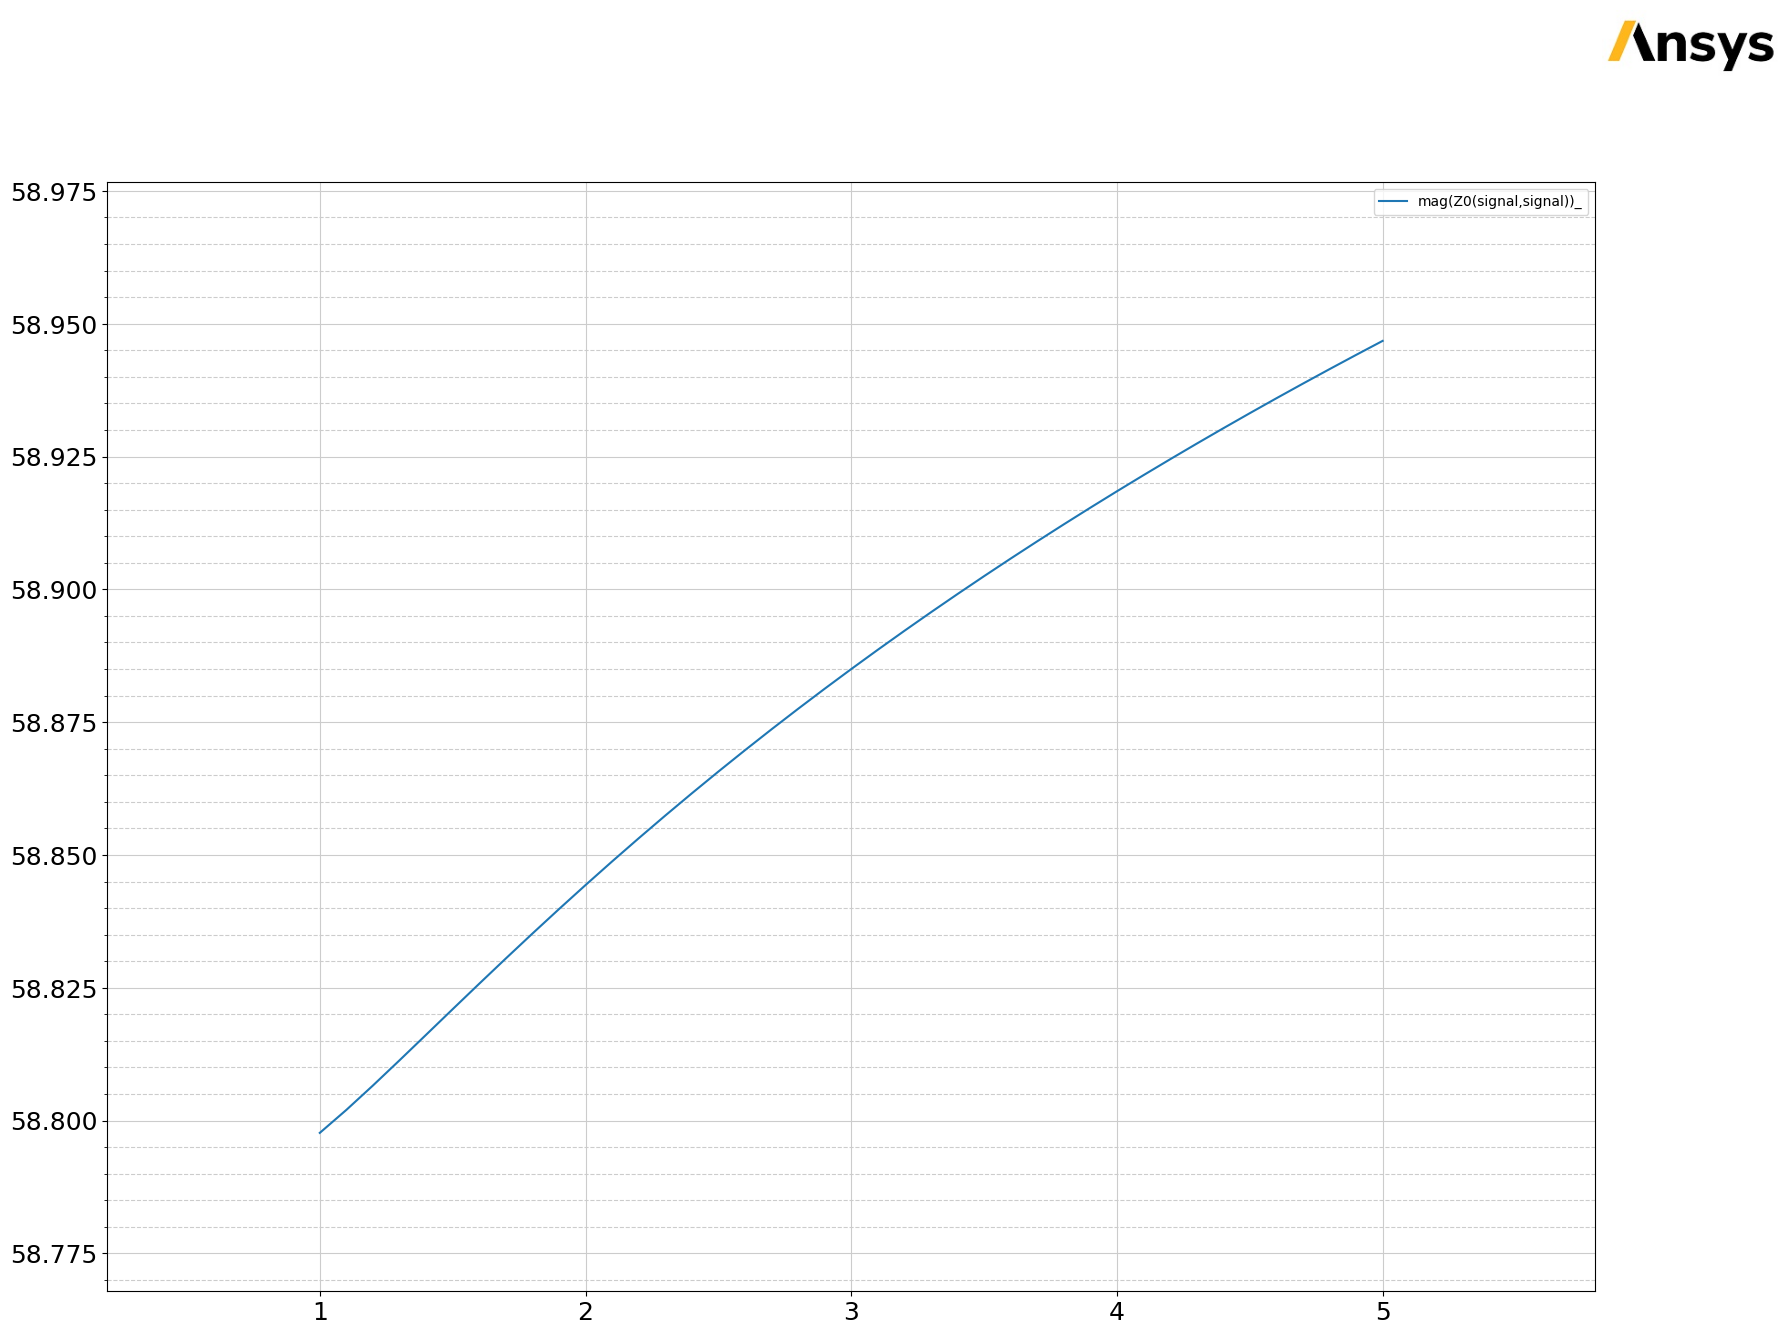

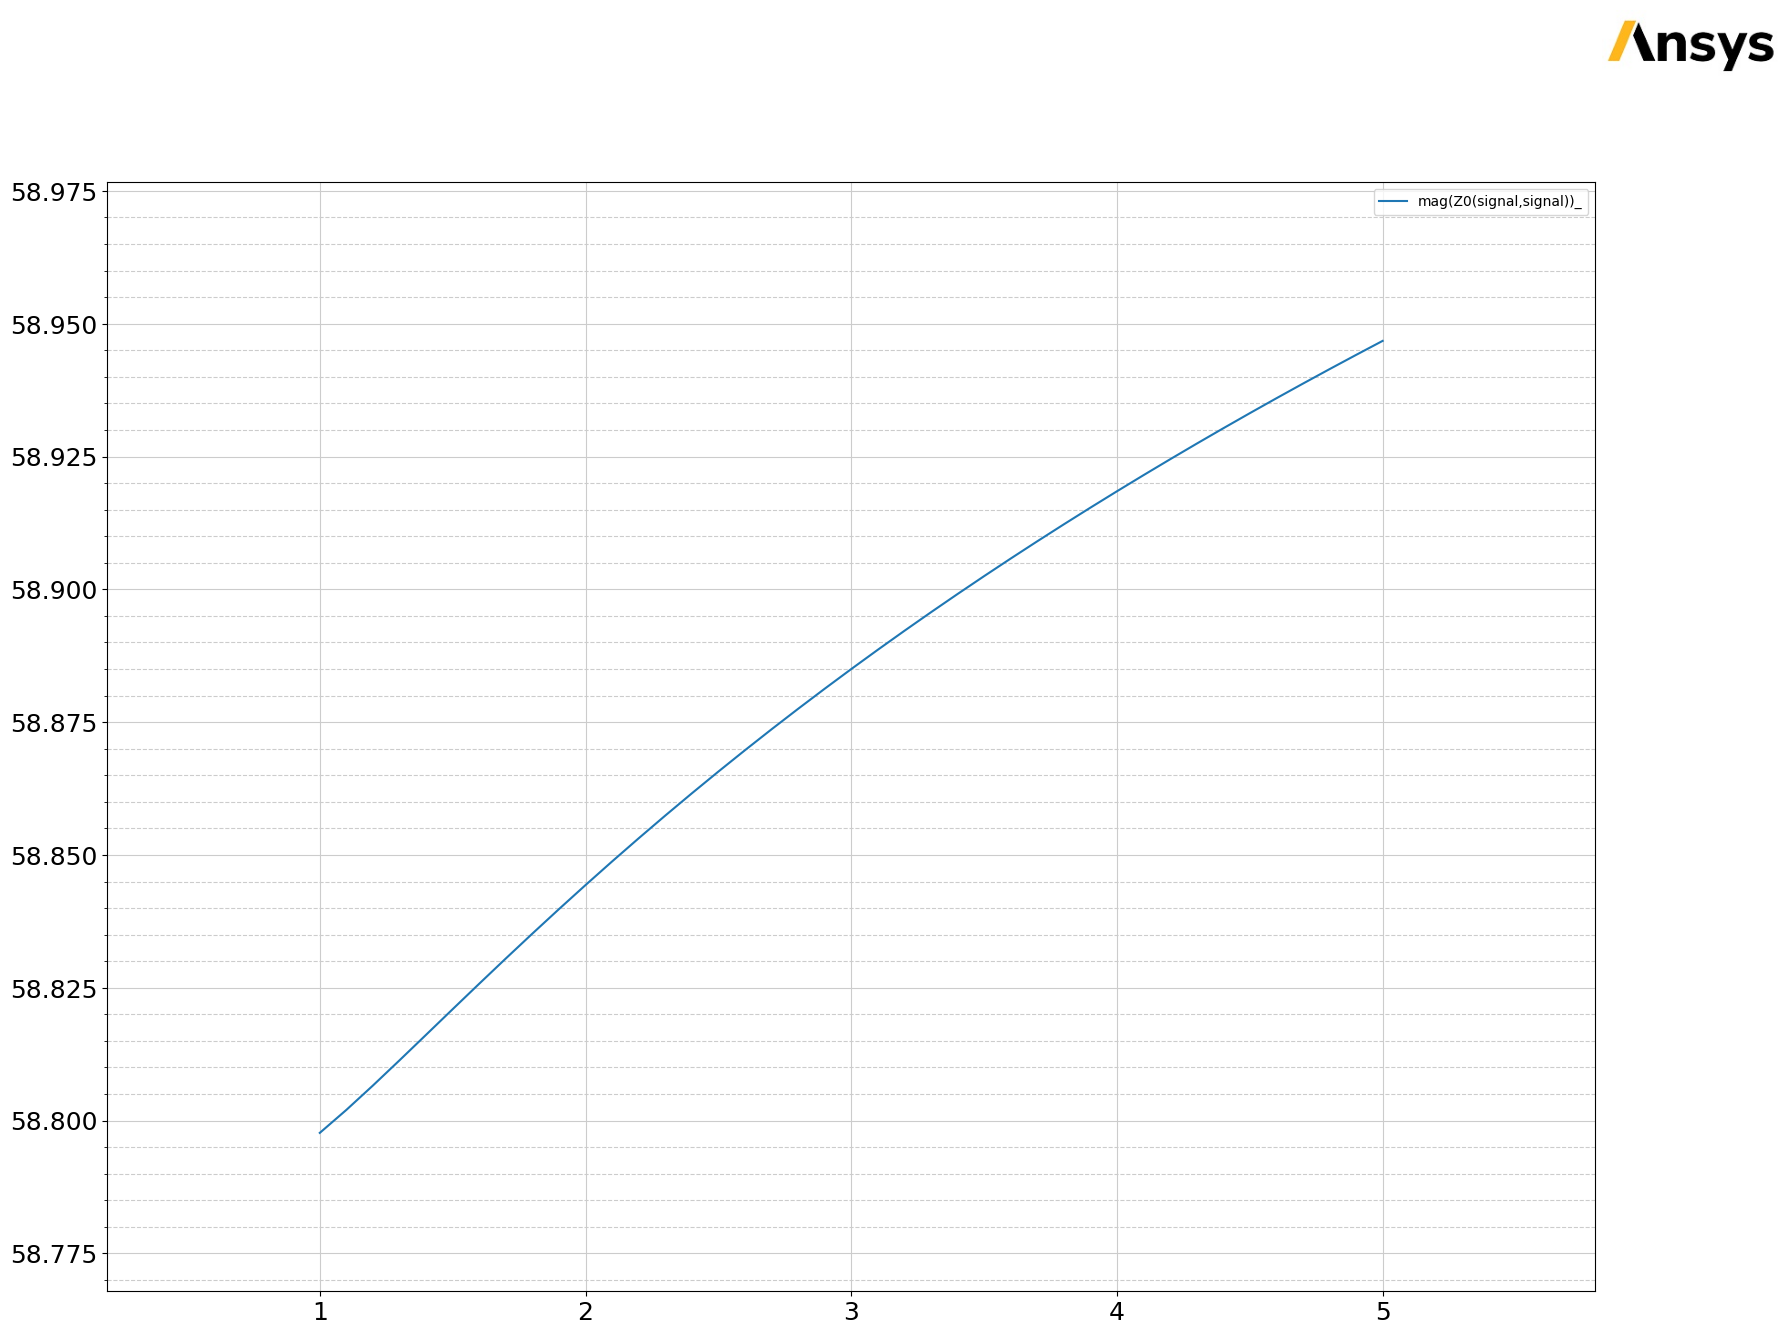

In [16]:
setup = q2d.create_setup(setupname="new_setup")

sweep = setup.add_sweep(name="sweep1", sweep_type="Discrete")
sweep.props["RangeType"] = "LinearStep"
sweep.props["RangeStart"] = "1GHz"
sweep.props["RangeStep"] = "100MHz"
sweep.props["RangeEnd"] = "5GHz"
sweep.props["SaveFields"] = False
sweep.props["SaveRadFields"] = False
sweep.props["Type"] = "Interpolating"

sweep.update()

q2d.analyze(cores=NUM_CORES)

data = q2d.post.get_solution_data(expressions="Z0(signal,signal)", context="Original")
data.plot()

## Release AEDT

In [17]:
q2d.save_project()
q2d.release_desktop()
# Wait 3 seconds to allow AEDT to shut down before cleaning the temporary directory.
time.sleep(3)

PyAEDT INFO: Project cpwg Saved correctly


PyAEDT INFO: Desktop has been released and closed.


## Clean up

All project files are saved in the folder ``temp_folder.name``.
If you've run this example as a Jupyter notebook, you
can retrieve those project files. The following cell
removes all temporary files, including the project folder.

In [18]:
temp_folder.cleanup()